In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import preproc as pp

import tensorflow as tf

version = "v2"
augp = Path("../scratch").joinpath("train_augmented_" + version)
modelp = Path("../scratch").joinpath("models")

train_ir, test_ir = pp.load_data(val_size=0)
train_aug, test_aug = pp.load_aug_data(augp, train_ir.element_spec, test_ind=[5])

2023-02-24 21:16:02.771370: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-24 21:16:04.870384: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-24 21:16:05.211568: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:ca:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.41GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-24 21:16:05.211600: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-24 21:16:05.214691: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-24 21:16:05.214763: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

In [4]:
net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056

In [12]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(10000, reshuffle_each_iteration=False)
val_ds = splitter.take(train_shape * val_size)
train_ds = splitter.skip(train_shape * val_size)

2023-02-24 21:21:03.237314: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-24 21:21:03.237336: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-24 21:21:03.875964: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-24 21:21:03.876152: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/20
   2/1688 [..............................] - ETA: 16:27 - loss: 5.2568 - accuracy: 0.2842  

2023-02-24 21:21:06.329728: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-24 21:21:06.329756: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


  26/1688 [..............................] - ETA: 1:28 - loss: 3.4786 - accuracy: 0.3184

2023-02-24 21:21:07.124312: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-02-24 21:21:07.124652: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-02-24 21:21:07.187977: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 112 callback api events and 100 activity events. 
2023-02-24 21:21:07.195609: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-24 21:21:07.217684: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: base_logs/train/plugins/profile/2023_02_24_21_21_07
2023-02-24 21:21:07.230171: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to base_logs/train/plugins/profile/2023_02_24_21_21_07/erc-hpc-comp036.trace.json.gz
2023-02-24 21:21:07.242838: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: bas

1688/1688 [==============================] - 17s 9ms/step - loss: 1.0011 - accuracy: 0.6952 - val_loss: 0.2250 - val_accuracy: 0.9327
Epoch 2/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.2904 - accuracy: 0.9126 - val_loss: 0.1675 - val_accuracy: 0.9496
Epoch 3/20
1688/1688 [==============================] - 16s 8ms/step - loss: 0.2214 - accuracy: 0.9333 - val_loss: 0.1394 - val_accuracy: 0.9571
Epoch 4/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1896 - accuracy: 0.9432 - val_loss: 0.1265 - val_accuracy: 0.9618
Epoch 5/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1692 - accuracy: 0.9487 - val_loss: 0.1199 - val_accuracy: 0.9635
Epoch 6/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1535 - accuracy: 0.9535 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 7/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1433 - accuracy: 0.9560 - val_loss: 0.1091 - val_accuracy: 0.9

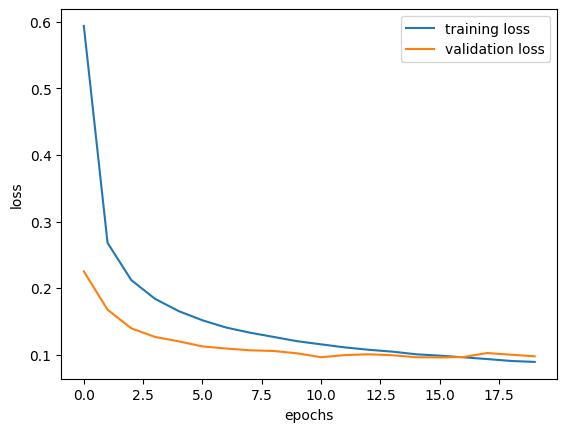

In [13]:
import datetime

net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

history = net.fit(
    train_ds.batch(256)
    , validation_data=val_ds.batch(256)
    , epochs=20
    , callbacks=[tf.keras.callbacks.TensorBoard(log_dir="base_logs", histogram_freq=1, write_graph=True, write_images=True)]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [14]:
(x_train, y_train), (x_test, y_test) = pp.load_data(return_eval=True)

net.evaluate(x_train, y_train), net.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9622


([0.16088786721229553, 0.9612500071525574],
 [0.15921086072921753, 0.9621999859809875])

In [16]:
net.evaluate(train_ds.batch(1048)), net.evaluate(val_ds.batch(1048)), net.evaluate(test_aug.batch(512))

118/118 [==============================] - 1s 10ms/step - loss: 0.1000 - accuracy: 0.9726


([0.04047610983252525, 0.9870671033859253],
 [0.0974043533205986, 0.9723888635635376],
 [0.10003398358821869, 0.9726166725158691])

In [17]:
net.save(modelp.joinpath("baseaug."+version+".h5").resolve().as_posix(), save_format="h5")